In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

Pregnancies: Número de gestações

Glucose: Concentração de glicose

BloodPressure: Pressão arterial

SkinThickness: Espessura da dobra cutânea

Insulin: Níveis de insulina

BMI: Índice de massa corporal

DiabetesPedigreeFunction: Histórico familiar

Age: Idade

Outcome: 0 = Não diabético, 1 = Diabético

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Verificar se existe valores nulos
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Verificar de 0 em cada coluna
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_check:
    print(f"{col}: {(dataset[col] == 0).sum()} valores zerados")


Glucose: 5 valores zerados
BloodPressure: 35 valores zerados
SkinThickness: 227 valores zerados
Insulin: 374 valores zerados
BMI: 11 valores zerados


In [6]:
# Verificar quantidade de cada classe
np.unique(dataset["Outcome"], return_counts = True)

(array([0, 1]), array([500, 268]))

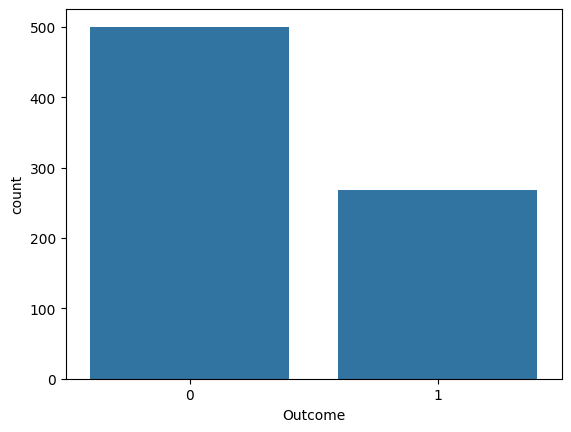

In [7]:
sns.countplot(x = "Outcome", data = dataset);

Text(0.5, 0.98, 'Distribuição dos dados')

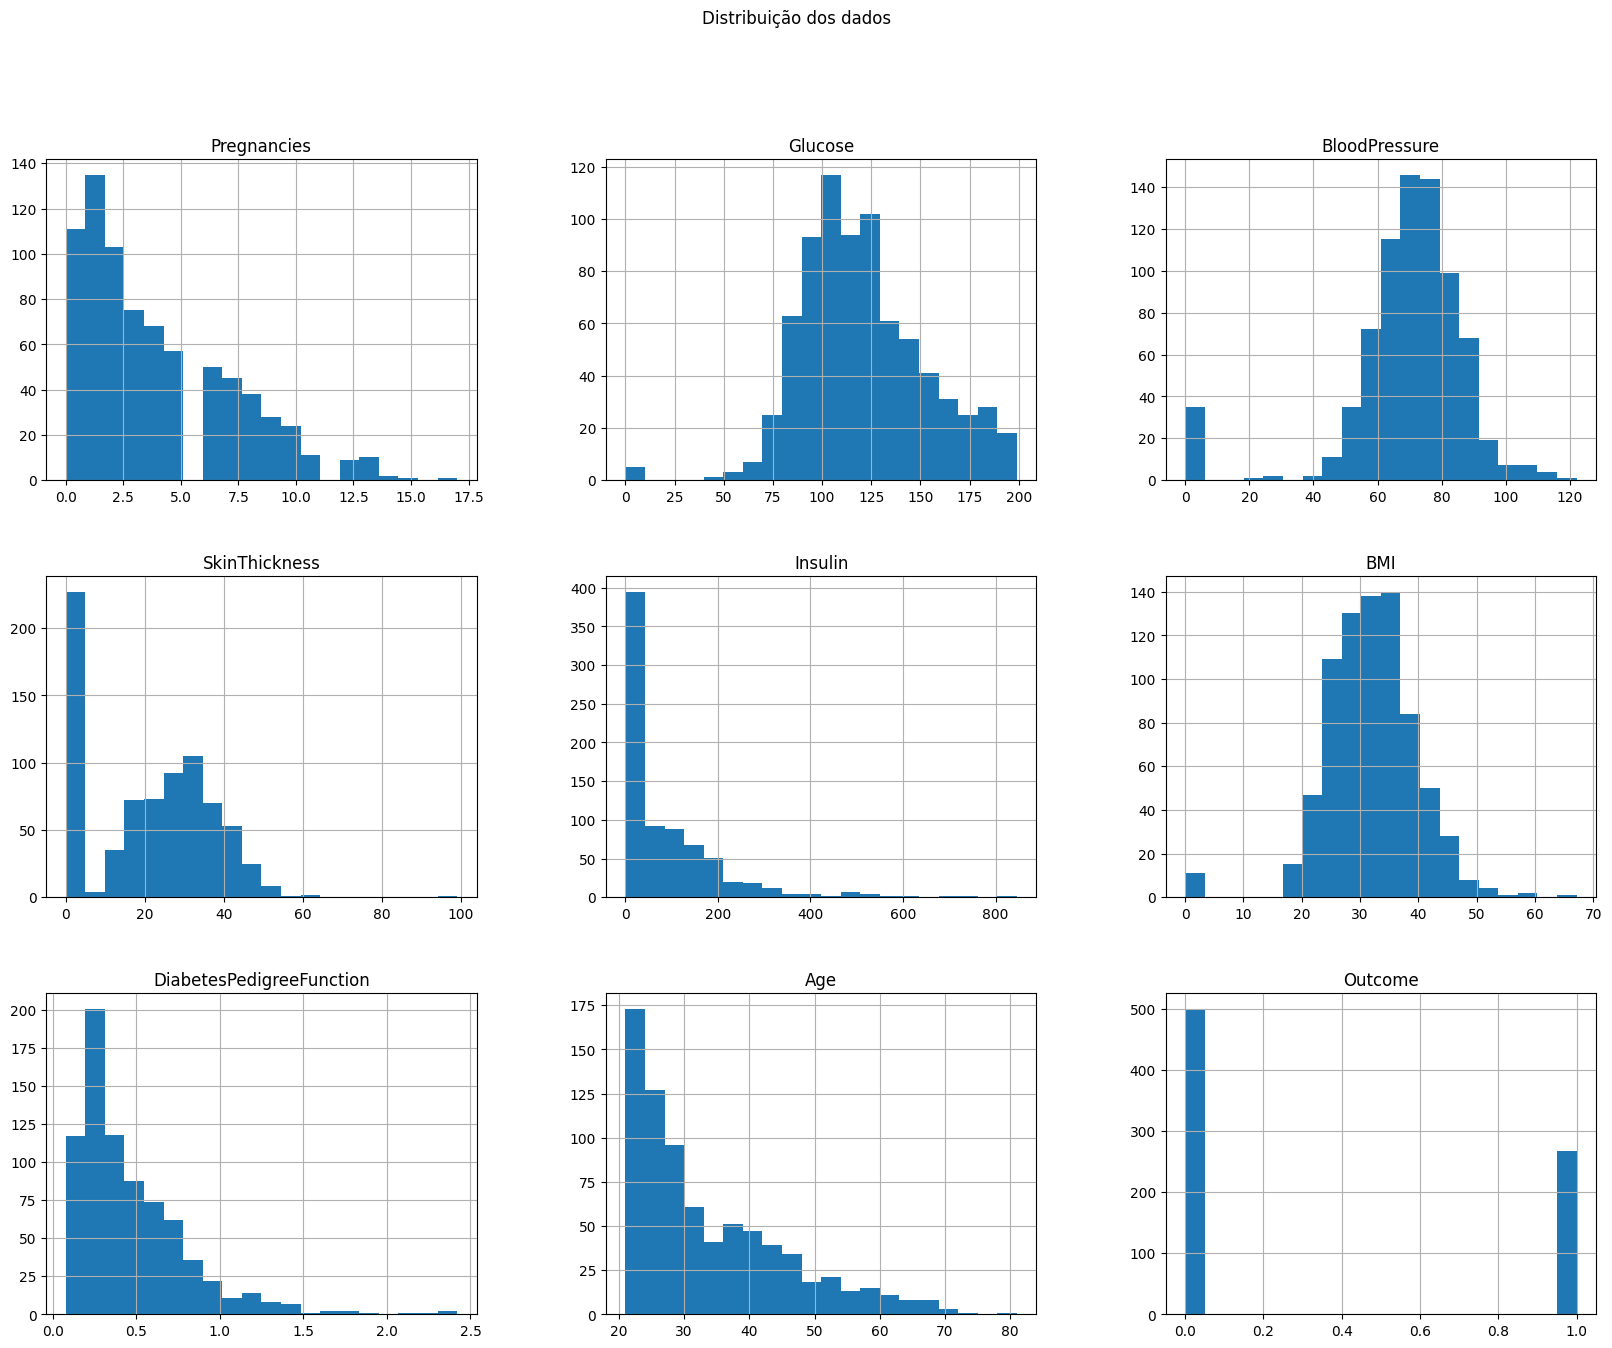

In [8]:
dataset.hist(bins = 20, figsize = (20, 15))
plt.suptitle("Distribuição dos dados")

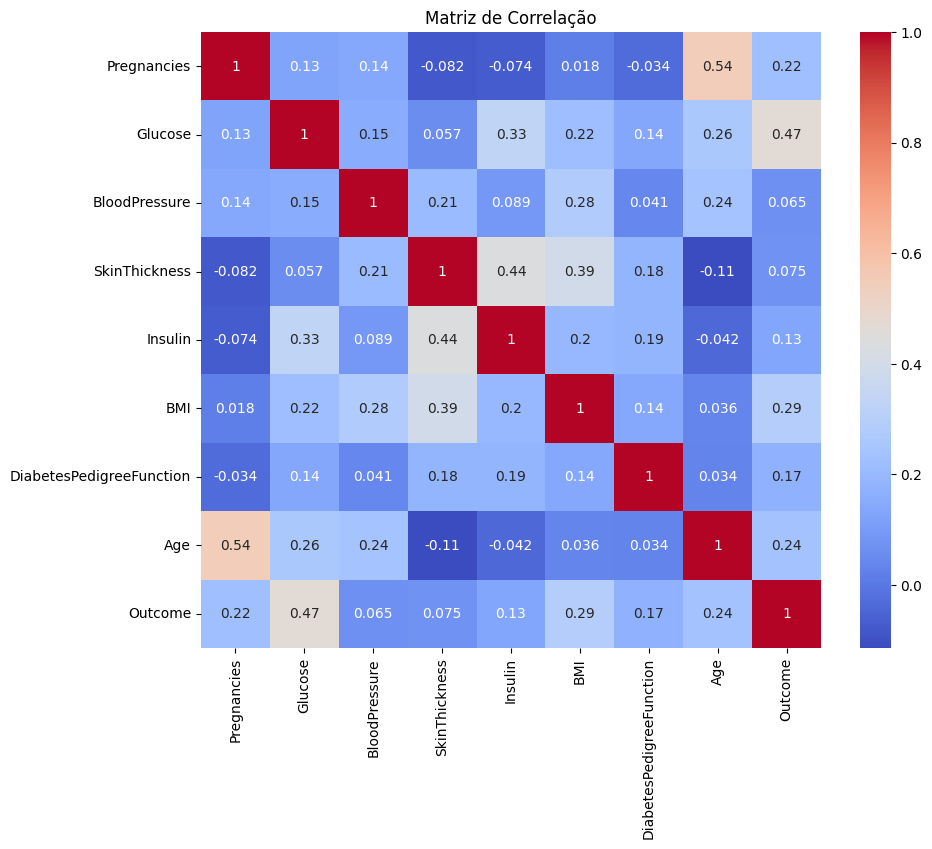

In [9]:
# Verificar correlação entre as variáveis
corr = dataset.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Matriz de Correlação");

In [10]:
# Separar as variáveis independentes e dependentes
X = dataset.drop("Outcome", axis = 1)
y = dataset["Outcome"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [ ]:
# Adicionando a média dos valores para substituir os zeros
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# Normalizar os dados
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

## Arvore de Decisão

In [14]:
params = {"criterion": ["gini", "entropy"],
              "splitter": ["best", "random"],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1,  5, 10]}

In [15]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'} 0.7561479741632413


## Random Forest

In [16]:
params = {"n_estimators": [10, 40, 100, 150],
              "criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1,  5, 10]}

In [17]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

{'criterion': 'entropy', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100} 0.7882795067527891


## kNN

In [18]:
params = {"n_neighbors": [3, 5, 10, 20], "p": [1, 2]}

In [19]:

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

{'n_neighbors': 20, 'p': 1} 0.7407751027598355


## Regressão Logistica

In [ ]:
params = {"tol": [0.0001, 0.00001, 0.000001],
              "C": [1.0, 1.5, 2.0],
              "solver": ["lbfgs", "sag", "saga"]}

grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)
# {'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001} 0.7652613035819142

## SVM

In [22]:
params = {"tol": [0.001, 0.0001, 0.00001],
              "C": [1.0, 1.5, 2.0],
              "kernel": ["rbf", "linear", "poly", "sigmoid"]}

grid_search = GridSearchCV(estimator=SVC(), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

{'C': 2.0, 'kernel': 'poly', 'tol': 0.001} 0.7637345860246624


## Redes Neurais

In [26]:
params = {"batch_size": [10, 56],
              "solver": ["adam", "sgd"],
              "activation": ["relu", "logistic", "tanh"]}

grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=1000), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

{'activation': 'logistic', 'batch_size': 56, 'solver': 'adam'} 0.742254844392249


## Avaliação cruzada

In [29]:
result_tree = []
results_random_forest = []
results_kNN = []
results_logistica = []
results_svm = []
results_rede_neural = []
for i in range(30):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = i)
  tree = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 10, min_samples_split = 2, splitter = "best")
  scores = cross_val_score(tree, X_train, y_train, cv = kfold)
  result_tree.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = "entropy", min_samples_leaf = 5, min_samples_split = 2, n_estimators = 100)
  scores = cross_val_score(random_forest, X_train, y_train, cv = kfold)
  results_random_forest.append(scores.mean())

  knn  = KNeighborsClassifier()
  scores = cross_val_score(knn, X_train, y_train, cv = kfold)
  results_kNN.append(scores.mean())

  logistic = LogisticRegression(C= 1.0, solver = "lbfgs", tol = 0.0001, max_iter=1000)
  scores = cross_val_score(logistic, X_train, y_train, cv = kfold)
  results_logistica.append(scores.mean())

  svm = SVC(kernel = "poly", C = 2.0, tol = 0.001)
  scores = cross_val_score(svm, X_train, y_train, cv = kfold)
  results_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = "logistic", batch_size = 56, solver = "adam", max_iter=1000)
  scores = cross_val_score(rede_neural, X_train, y_train, cv = kfold)
  results_rede_neural.append(scores.mean())

In [ ]:
# Analisando as métricas de desempenho dos modelos, o Random Forest apresenta a maior média de acurácia (0.7711) entre todos os modelos testados, além do menor desvio padrão (0.0070), indicando que é o modelo mais consistente e robusto para este conjunto de dados. Por isso, a escolha do Random Forest para o treinamento final é justificada, buscando o melhor equilíbrio entre performance e estabilidade.

results = pd.DataFrame({
    "Arvore": result_tree,
    "Random forest": results_random_forest,
    "KNN": results_kNN,
    "Regressão logistica": results_logistica,
    "SVM": results_svm,
    "Rede neural": results_rede_neural
})
results.describe()

,Arvore,Random forest,KNN,Regressão logistica,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.744081,0.771098,0.720353,0.764197,0.764822,0.745577
std,0.013469,0.006962,0.008925,0.003227,0.004061,0.009792
min,0.717855,0.749930,0.697576,0.759231,0.757576,0.723846
25%,0.736160,0.766876,0.715612,0.762110,0.761154,0.740798
50%,0.743065,0.770070,0.721562,0.763881,0.765326,0.746888
75%,0.754586,0.774627,0.726492,0.766783,0.766923,0.752255
max,0.777529,0.782261,0.734732,0.771469,0.773054,0.759161


In [35]:
model_random_forest = RandomForestClassifier(criterion = "entropy", min_samples_leaf = 5, min_samples_split = 2, n_estimators = 100)
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=5)

In [36]:
y_pred = model_random_forest.predict(X_test)

In [38]:
print("Acurácia no teste:", accuracy_score(y_test, y_pred))

Acurácia no teste: 0.7413793103448276
